In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

x = torch.linspace(0,799,800)
y = torch.sin(x*2*3.1416/40)

plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sin")
plt.title("Sin plot")
plt.plot(y.numpy())
plt.show()


KeyboardInterrupt



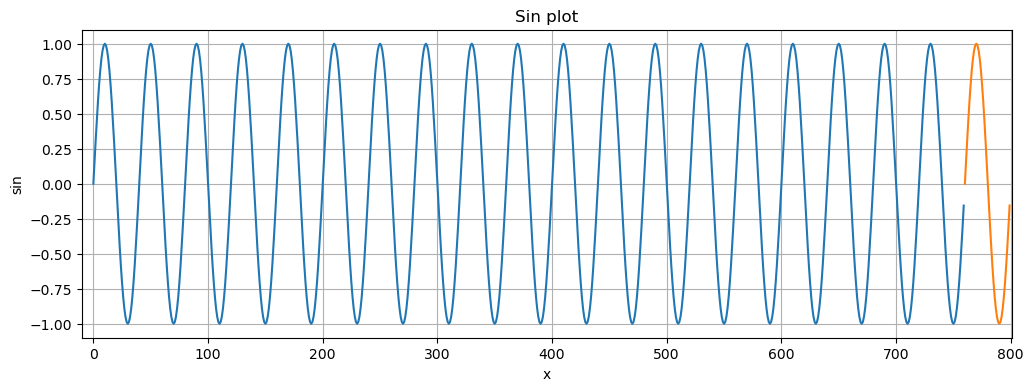

In [7]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sin")
plt.title("Sin plot")
plt.plot(train_set.numpy())
plt.plot(range(760,800),test_set.numpy())
plt.show()

In [5]:
def input_data(seq,ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    
    return out

window_size = 40
train_data = input_data(train_set, window_size)

In [6]:
class LSTM(nn.Module):    
    def __init__(self,input_size = 1, hidden_size = 50, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size,out_size)
        self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

Epoch 0 Loss: 0.09212879836559296
Performance on test range: 0.6071590185165405
Epoch 1 Loss: 0.06506762653589249
Performance on test range: 0.5650987029075623
Epoch 2 Loss: 0.04198049008846283
Performance on test range: 0.5199716687202454
Epoch 3 Loss: 0.017842795699834824
Performance on test range: 0.42209967970848083
Epoch 4 Loss: 0.0028871013782918453
Performance on test range: 0.16624124348163605
Epoch 5 Loss: 0.0003200773790013045
Performance on test range: 0.030554458498954773
Epoch 6 Loss: 0.00012969171802978963
Performance on test range: 0.014990185387432575
Epoch 7 Loss: 0.00012006635370198637
Performance on test range: 0.011856685392558575
Epoch 8 Loss: 0.00012655757018364966
Performance on test range: 0.010163738392293453
Epoch 9 Loss: 0.0001319547591265291
Performance on test range: 0.008897582069039345


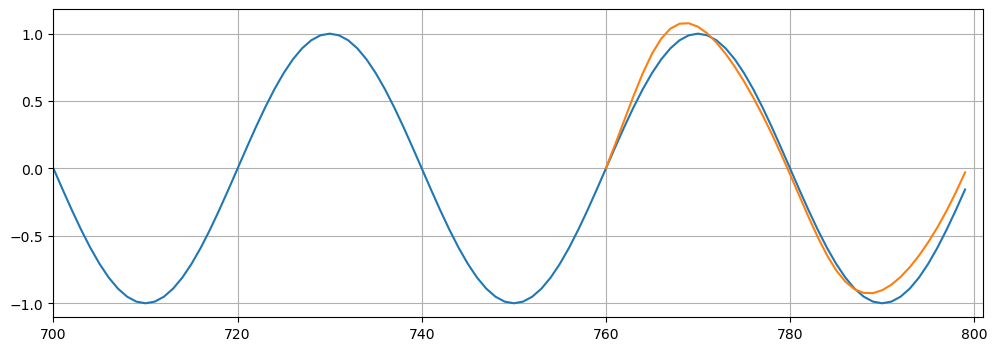

In [9]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 10
future = 40

for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {i} Loss: {loss.item()}")
    
    preds = train_set[-window_size:].tolist()
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                           torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
        
    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f"Performance on test range: {loss}")
    if i % 10 == 9:      
        plt.figure(figsize=(12,4))
        plt.xlim(700,801)
        plt.grid(True)
        plt.plot(y.numpy())
        plt.plot(range(760,800),preds[window_size:])
        plt.show()

In [33]:
class RNN(nn.Module):    
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size)
        self.hidden = torch.zeros(1, 1, hidden_size)
        
    def forward(self, seq):
        rnn_out, self.hidden = self.rnn(seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(rnn_out.view(len(seq), -1))
        return pred[-1]
        """
        rnn_out, hidden = self.rnn(seq.view(len(seq), 1, -1), hidden)
        pred = self.linear(rnn_out.view(len(seq), -1))
        return pred[-1], hidden"""
    

Epoch 0 Loss: 0.0004883047076873481
Performance on test range: 0.3852284550666809
Epoch 1 Loss: 9.141618306784949e-07
Performance on test range: 0.0074979886412620544
Epoch 2 Loss: 1.5572115898976335e-06
Performance on test range: 0.007265125401318073
Epoch 3 Loss: 2.361163296882296e-06
Performance on test range: 0.007016466464847326
Epoch 4 Loss: 3.315810772619443e-06
Performance on test range: 0.006754052825272083
Epoch 5 Loss: 4.41083784608054e-06
Performance on test range: 0.00648029800504446
Epoch 6 Loss: 5.634642093355069e-06
Performance on test range: 0.006197537295520306
Epoch 7 Loss: 6.97775340086082e-06
Performance on test range: 0.005907994695007801
Epoch 8 Loss: 8.427666216448415e-06
Performance on test range: 0.005613967776298523
Epoch 9 Loss: 9.976466571970377e-06
Performance on test range: 0.0053178309462964535


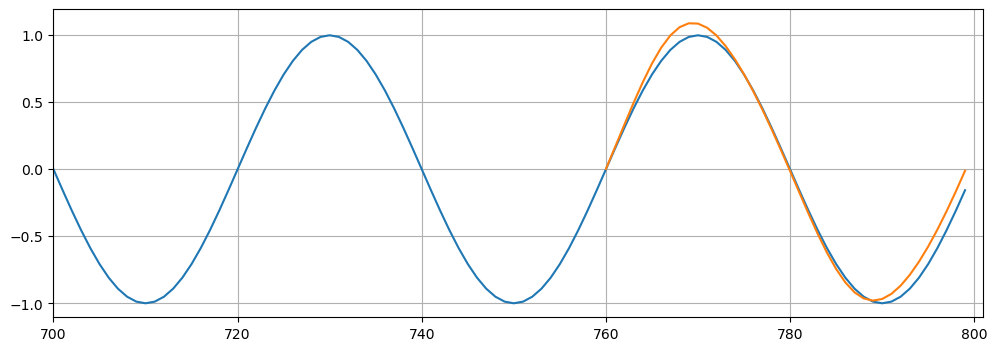

In [12]:
torch.manual_seed(42)
model = RNN()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 10
future = 40

for i in range(epochs):
    
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = torch.zeros(1, 1, model.hidden_size)
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {i} Loss: {loss.item()}")
    
    preds = train_set[-window_size:].tolist()
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = torch.zeros(1, 1, model.hidden_size)
            preds.append(model(seq).item())
        
    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f"Performance on test range: {loss}")
    if i % 10 == 9:      
        plt.figure(figsize=(12,4))
        plt.xlim(700,801)
        plt.grid(True)
        plt.plot(y.numpy())
        plt.plot(range(760,800),preds[window_size:])
        plt.show()

In [16]:
df = pd.read_csv("/Users/Tara/Desktop/gwu_courses/2024_fall/CSCI_6366_NN/project/Alcohol_Sales.csv", index_col = 0, parse_dates = True)
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


325


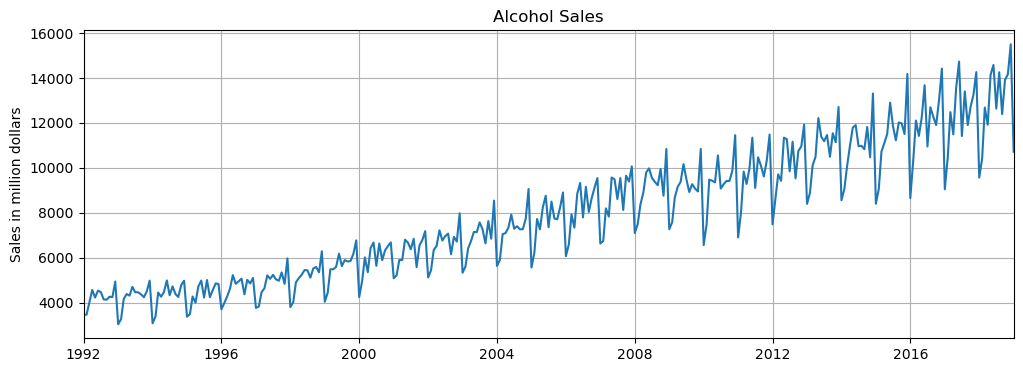

In [18]:
df.dropna(inplace=True)
print(len(df))
plt.figure(figsize = (12,4))
plt.title('Alcohol Sales')
plt.ylabel('Sales in million dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.show()

In [19]:
#extracting the time series values
y = df['S4248SM144NCEN'].values.astype(float) 

#defining a test size
test_size = 12

#create train and test splits
train_set = y[:-test_size]
test_set = y[-test_size:]
test_set


array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

In [20]:
from sklearn.preprocessing import MinMaxScaler

# instantiate a scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# normalize the training set
train_norm = scaler.fit_transform(train_set.reshape(-1, 1))

# convert train_norm to a tensor
train_norm = torch.FloatTensor(train_norm).view(-1)

# define a window size
window_size = 12
# define a function to create sequence/label tuples
def input_data(seq,ws):
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

# apply input_data to train_norm
train_data = input_data(train_norm, window_size)


In [41]:
torch.manual_seed(42)
model = LSTM(hidden_size=100)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200

import time
start_time = time.time()

for epoch in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
    if epoch%10 == 9: 
        print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch: 10 Loss: 0.30106211
Epoch: 20 Loss: 0.26684552
Epoch: 30 Loss: 0.00104768
Epoch: 40 Loss: 0.00000179
Epoch: 50 Loss: 0.00135706
Epoch: 60 Loss: 0.00174671
Epoch: 70 Loss: 0.00083388
Epoch: 80 Loss: 0.00000397
Epoch: 90 Loss: 0.00135571
Epoch: 100 Loss: 0.00025412
Epoch: 110 Loss: 0.00324574
Epoch: 120 Loss: 0.00062693
Epoch: 130 Loss: 0.00027398
Epoch: 140 Loss: 0.00005811
Epoch: 150 Loss: 0.00095392
Epoch: 160 Loss: 0.00067138
Epoch: 170 Loss: 0.00110924
Epoch: 180 Loss: 0.00009179
Epoch: 190 Loss: 0.00027430
Epoch: 200 Loss: 0.00308134

Duration: 261 seconds


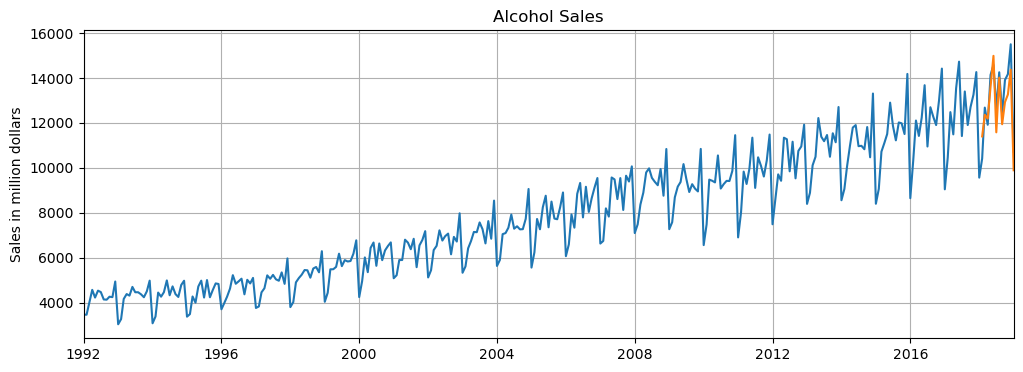

In [23]:
future = 12

preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())
preds[window_size:]

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))

x = np.arange('2018-02-01', '2019-02-01', dtype='datetime64[M]').astype('datetime64[D]')
plt.figure(figsize=(12,4))
plt.title('Alcohol Sales')
plt.ylabel('Sales in million dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions)
plt.show()

In [35]:
class RNN(nn.Module):    
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size)
        self.hidden = torch.zeros(1, 1, hidden_size)
        
    def forward(self, seq):
        rnn_out, self.hidden = self.rnn(seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(rnn_out.view(len(seq), -1))
        return pred[-1]

In [40]:
torch.manual_seed(42)
model = RNN(hidden_size=200)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_data = input_data(train_norm, window_size)

epochs = 100
start_time = time.time()


for epoch in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = torch.zeros(1, 1, model.hidden_size)
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)
        optimizer.step()
    if epoch%10 == 9: 
        print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')

Epoch: 10 Loss: 0.00776052
Epoch: 20 Loss: 0.17559236
Epoch: 30 Loss: 0.01486077
Epoch: 40 Loss: 0.00496030
Epoch: 50 Loss: 0.00019204
Epoch: 60 Loss: 0.27292189
Epoch: 70 Loss: 0.04898128
Epoch: 80 Loss: 0.29726726
Epoch: 90 Loss: 0.34865338
Epoch: 100 Loss: 0.34837961


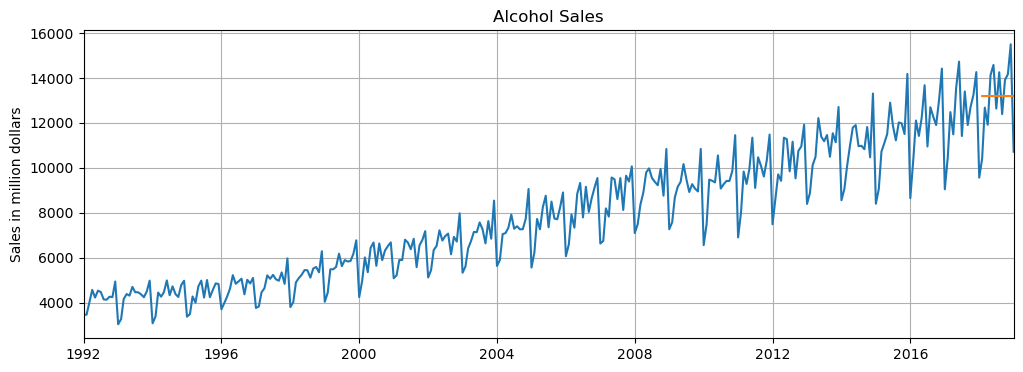

In [37]:
future = 12

preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())
preds[window_size:]

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))

x = np.arange('2018-02-01', '2019-02-01', dtype='datetime64[M]').astype('datetime64[D]')
plt.figure(figsize=(12,4))
plt.title('Alcohol Sales')
plt.ylabel('Sales in million dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions)
plt.show()

In [38]:
torch.manual_seed(42)
model = RNN(hidden_size=200)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 100
start_time = time.time()


for epoch in range(epochs):
    if loss < 0.001:
        print("early stop: ", epoch)
        break
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = torch.zeros(1, 1, model.hidden_size)
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)
        optimizer.step()
    if epoch%10 == 9: 
        print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')

early stop:  8


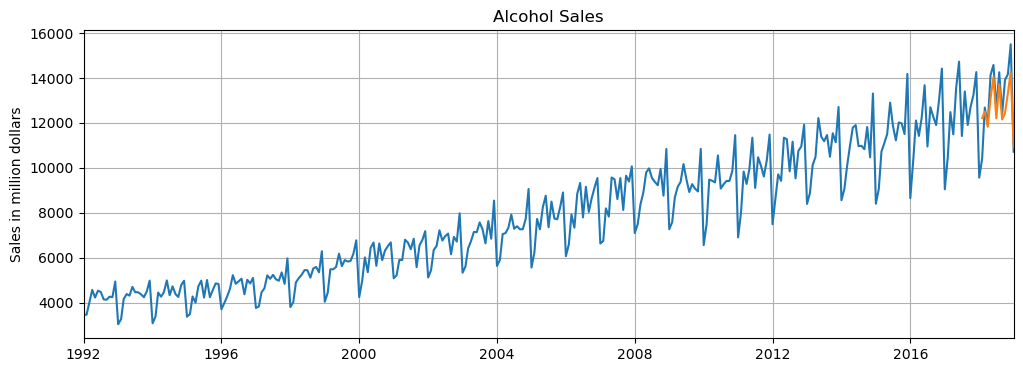

In [39]:
future = 12

preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())
preds[window_size:]

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))

x = np.arange('2018-02-01', '2019-02-01', dtype='datetime64[M]').astype('datetime64[D]')
plt.figure(figsize=(12,4))
plt.title('Alcohol Sales')
plt.ylabel('Sales in million dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions)
plt.show()

In [ ]:
    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        H = Wh.shape[0]

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')
        if not self.stateful or self.c is None:
            self.c = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = LSTM(*self.params)
            self.h, self.c = layer.forward(xs[:, t, :], self.h, self.c)
            hs[:, t, :] = self.h

            self.layers.append(layer)

        return hs

In [ ]:
    def forward(self, x, h_prev, c_prev):
        Wx, Wh, b = self.params
        N, H = h_prev.shape

        A = np.dot(x, Wx) + np.dot(h_prev, Wh) + b

        f = A[:, :H]
        g = A[:, H:2*H]
        i = A[:, 2*H:3*H]
        o = A[:, 3*H:]

        f = sigmoid(f)
        g = np.tanh(g)
        i = sigmoid(i)
        o = sigmoid(o)

        c_next = f * c_prev + g * i
        h_next = o * np.tanh(c_next)

        self.cache = (x, h_prev, c_prev, i, f, g, o, c_next)
        return h_next, c_next

In [ ]:
    def backward(self, dh_next, dc_next):
        Wx, Wh, b = self.params
        x, h_prev, c_prev, i, f, g, o, c_next = self.cache
        tanh_c_next = np.tanh(c_next)

        ds = dc_next + (dh_next * o) * (1 - tanh_c_next ** 2)
        dc_prev = ds * f

        di = ds * g
        df = ds * c_prev
        do = dh_next * tanh_c_next
        dg = ds * i

        di *= i * (1 - i)
        df *= f * (1 - f)
        do *= o * (1 - o)
        dg *= (1 - g ** 2)

        dA = np.hstack((df, dg, di, do))
        dWh = np.dot(h_prev.T, dA)
        dWx = np.dot(x.T, dA)
        db = dA.sum(axis=0)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        dx = np.dot(dA, Wx.T)
        dh_prev = np.dot(dA, Wh.T)

        return dx, dh_prev, dc_prev